In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds 

In [3]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs 

Show files in the data directory

In [4]:
data_dir = os.path.join('../data/raw_data')
os.listdir(data_dir)

['multiqc_report.html',
 'multiqc_stats_4.0.csv',
 '.DS_Store',
 'metadata_083021.csv',
 'log_tpm_4.0.csv',
 'log_tpm_083021.csv',
 'multiqc_stats.tsv',
 '8.30.21_ABNovaSeqSamples.xlsx',
 'counts_083021.csv',
 'metadata_curated_4.0.csv']

Enter name of curated metadata file here

In [5]:
metadata_file = "metadata_curated.csv"

## Load expression data

In [6]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 3895
Number of samples: 162


In [7]:
DF_log_tpm.head()

,Abaum_0001,Abaum_0002,Abaum_0003,Abaum_0004,Abaum_0005,Abaum_0006,Abaum_0007,Abaum_0008,Abaum_0009,Abaum_0010,...,ABNM039,ABNM040,ABNM041,ABNM042,ABNM043,ABNM044,ABNM045,ABNM046,ABNM047,ABNM048
Geneid,,,,,,,,,,,,,,,,,,,,,
ABUW_6001,6.162303,6.057743,6.193528,6.024322,5.797486,6.854015,6.651171,6.358583,6.520595,6.593531,...,7.050323,7.280878,6.458105,5.963387,6.173665,6.579756,6.184229,6.448737,7.681953,7.634922
ABUW_6002,7.077112,7.042338,7.911574,7.229813,7.301443,7.133781,6.642640,7.391063,8.003876,7.839017,...,7.485842,8.642665,8.073417,7.508498,7.797045,7.845798,7.593737,7.653610,9.496484,9.536581
ABUW_6003,7.628470,8.627994,8.970377,8.356422,7.983963,9.083200,8.724565,8.839581,8.973797,9.548375,...,8.810006,9.224818,8.863645,8.614798,9.351677,9.533243,8.799210,9.244271,10.697152,10.696880
ABUW_5001,7.533777,7.713697,7.991543,8.270640,8.860830,8.552435,8.084747,7.642735,7.823923,7.798745,...,7.966934,8.302388,8.018505,7.674180,7.525324,7.855252,7.786375,7.701836,9.352922,9.281201
ABUW_5002,6.744877,6.967491,6.596592,7.103911,7.335995,7.476638,7.367345,6.993174,6.693917,6.813406,...,6.097708,6.474721,5.912874,5.920618,6.221834,6.411846,5.890878,5.932482,6.833930,6.926192


## Load QC data

There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.

In [8]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.csv'),index_col=0)
print('Number of samples with QC data:',DF_qc_stats.shape[0])
print('Columns:',DF_qc_stats.shape[1])

Number of samples with QC data: 164
Columns: 54


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Abaum_0001,6167079.0,4403847.0,330375.0,192365.0,0.0,0.0,0.0,0.0,352417.0,0.0,...,6172690.0,314807190,169667,311892133,0.925982,0.1598,0.8402,0.0,0.0,0.0
Abaum_0002,5730887.0,3956479.0,332288.0,233606.0,0.0,0.0,0.0,0.0,406844.0,0.0,...,5735887.0,292530237,155954,289832810,0.922102,0.1319,0.8681,0.0,0.0,0.0
Abaum_0003,6071002.0,4420932.0,45340.0,221182.0,0.0,0.0,0.0,0.0,322476.0,0.0,...,6075776.0,309864576,182657,306949424,0.940783,0.1465,0.8535,0.0,0.0,0.0
Abaum_0004,5664805.0,4094918.0,116138.0,157106.0,0.0,0.0,0.0,0.0,317658.0,0.0,...,5669326.0,289135626,163691,286404708,0.944511,0.2957,0.7043,0.0,0.0,0.0
Abaum_0005,5583850.0,4054363.0,11765.0,145353.0,0.0,0.0,0.0,0.0,258047.0,0.0,...,5588013.0,284988663,158880,282292257,0.946145,0.3194,0.6806,0.0,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(data_dir,'metadata_curated_4.0.csv'),index_col=0,sep=',')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 164


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,aerobicity,supplement,temperature,pH,growth_phase,OD,notes,Title,Condition,additional_notes
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX1464764,3/30/16 17:09,1116234,Acinetobacter baumannii AB5075,470,1236,1116234,Acinetobacter baumannii,SINGLE,ION_TORRENT,Ion Torrent PGM,...,0,0,0,0,0,0.0,0,0,0,0
SRX1928983,9/29/16 16:56,470,Acinetobacter baumannii,470,1236,470,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 4000,...,0,0,0,0,0,0.0,0,0,0,0
SRX1928979,9/29/16 16:56,470,Acinetobacter baumannii,470,1236,470,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 4000,...,0,0,0,0,0,0.0,0,0,0,0
SRX1928984,9/29/16 16:56,470,Acinetobacter baumannii,470,1236,470,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 4000,...,0,0,0,0,0,0.0,0,0,0,0
SRX1928980,9/29/16 16:56,470,Acinetobacter baumannii,470,1236,470,Acinetobacter baumannii,SINGLE,ILLUMINA,Illumina HiSeq 4000,...,0,0,0,0,0,0.0,0,0,0,0


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

In [13]:
print('Number of samples from metadata:',DF_metadata.shape[0])
print('Number of samples from qc stats:',DF_qc_stats.shape[0])

Number of samples from metadata: 162
Number of samples from qc stats: 162


# Check statistics

From here, create a new spreadsheet where you can flag samples based on various QC statistics


## FastQC stats

In [14]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

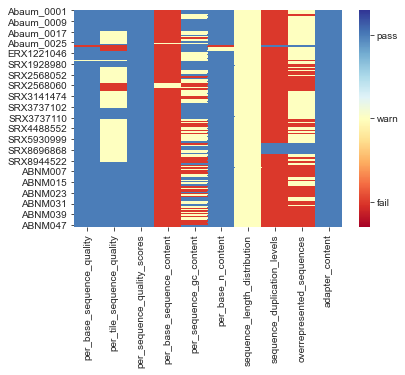

In [15]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

The following four categories are the most important: 
- per_base_sequence_quality 
- per_sequence_quality_scores 
- per_base_n_content 
- adapter_content

If a sample does not pass any of these four categories, discard the sample

In [16]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [17]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ERX1215169,fail,pass,fail,pass
ERX1215170,pass,pass,warn,pass
ERX1215171,pass,pass,warn,pass
ERX1215172,pass,pass,warn,pass
SRX1464764,warn,pass,pass,pass


In [18]:
print('Number of samples that failed fastqc:',DF_failed_fastqc.shape[0])

Number of samples that failed fastqc: 5


Mark samples as failed.

In [19]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

In [20]:
DF_metadata['passed_fastqc'] 

Abaum_0001    True
Abaum_0002    True
Abaum_0003    True
Abaum_0004    True
Abaum_0005    True
              ... 
ABNM044       True
ABNM045       True
ABNM046       True
ABNM047       True
ABNM048       True
Name: passed_fastqc, Length: 162, dtype: bool

## Number of aligned reads

The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.

In [21]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

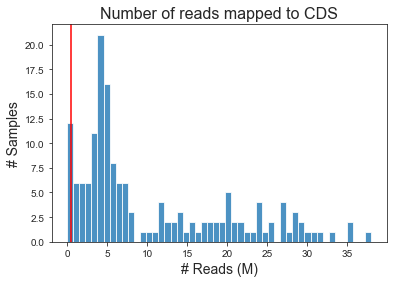

In [22]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

In [23]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX8696864,2089808.0,47.0,6.0,2085786.0,0.0,0.0,0.0,0.0,48.0,0.0,...,2100532.0,288251916,520906,286413872,0.637652,0.0000,1.0000,0.0000,0.0,0.0
SRX8696871,2703472.0,125.0,1.0,2697479.0,0.0,0.0,0.0,0.0,74.0,0.0,...,2714850.0,376967091,734934,374736266,0.591782,0.0000,1.0000,0.0000,0.0,0.0
SRX8696865,1814795.0,3484.0,27.0,1810838.0,0.0,0.0,0.0,0.0,33.0,0.0,...,1820144.0,256954408,537301,255778008,0.457824,0.0000,0.0000,0.0000,0.0,0.0
SRX8696869,2114821.0,3632.0,172.0,2110486.0,0.0,0.0,0.0,0.0,69.0,0.0,...,2124003.0,291317155,569627,289510243,0.620256,1.0000,0.0000,0.0000,0.0,0.0
SRX8696868,2371869.0,4014.0,130.0,2367072.0,0.0,0.0,0.0,0.0,77.0,0.0,...,2383998.0,324518012,664217,322296604,0.684525,1.0000,0.0000,0.0000,0.0,0.0
SRX8696866,2341245.0,4346.0,212.0,2336102.0,0.0,0.0,0.0,0.0,57.0,0.0,...,2349904.0,325156264,787001,323422005,0.533362,0.6000,0.4000,0.0000,0.0,0.0
SRX8696870,2210363.0,4482.0,25.0,2205203.0,0.0,0.0,0.0,0.0,78.0,0.0,...,2221187.0,300812977,642286,298614635,0.730800,0.0000,0.0000,0.0000,0.0,0.0
SRX8696867,2682600.0,5102.0,11.0,2676674.0,0.0,0.0,0.0,0.0,52.0,0.0,...,2694653.0,371863792,766009,369607269,0.606814,1.0000,0.0000,0.0000,0.0,0.0
ABNM039,7237590.0,371687.0,298990.0,6472323.0,0.0,0.0,0.0,0.0,18302.0,0.0,...,7250611.0,369781161,191774,366840066,0.795361,0.0521,0.6076,0.3403,0.0,0.0
SRX3737102,10316430.0,379879.0,51911.0,9756081.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10330017.0,537160884,2451404,530216567,1.292782,0.0000,0.0000,0.0000,0.0,0.0


In [24]:
print('Number of samples that failed min mRNA reads:',DF_failed_mrna.shape[0])

Number of samples that failed min mRNA reads: 10


Mark samples as failed.

In [25]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

In [26]:
DF_metadata['passed_reads_mapped_to_CDS']

Abaum_0001    True
Abaum_0002    True
Abaum_0003    True
Abaum_0004    True
Abaum_0005    True
              ... 
ABNM044       True
ABNM045       True
ABNM046       True
ABNM047       True
ABNM048       True
Name: passed_reads_mapped_to_CDS, Length: 162, dtype: bool

# Examine Global Correlations

## Hierarchical Clustering

A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap

To increase the number of clusters, decrease the value of thresh. To decrease the number of clusters, increase the value of thresh

In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  5


To view sample IDs in the clustermap, set xticklabels and yticklabels to True. You can increase the size variable to improve readability of sample IDs

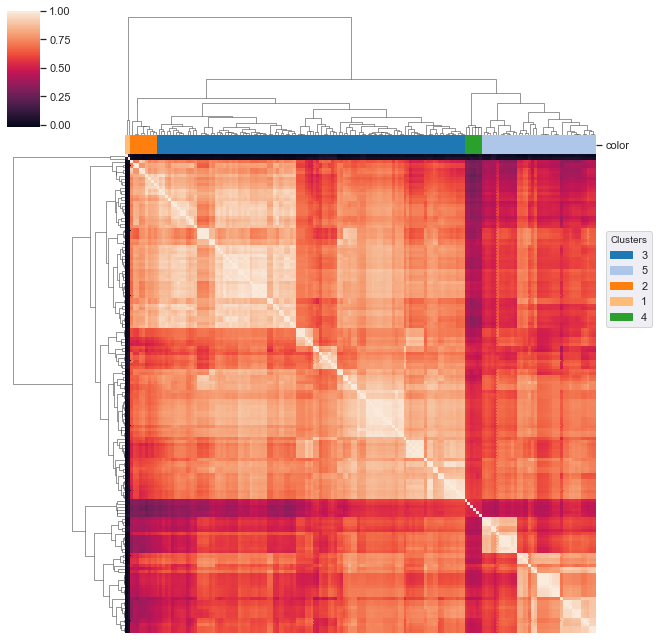

In [28]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

Indicate which clusters you want to remove:

In [29]:
remove_clst = [1]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [30]:
print('Number of samples that failed global correlations:',failed_global_corr.shape[0])

Number of samples that failed global correlations: 2


In [31]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [32]:
DF_metadata['passed_global_correlation']

Abaum_0001    True
Abaum_0002    True
Abaum_0003    True
Abaum_0004    True
Abaum_0005    True
              ... 
ABNM044       True
ABNM045       True
ABNM046       True
ABNM047       True
ABNM048       True
Name: passed_global_correlation, Length: 162, dtype: bool

# Remove failed samples

In [33]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [34]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

In [35]:
print('Number of samples that passed:',DF_metadata_passed.shape[0])

Number of samples that passed: 147


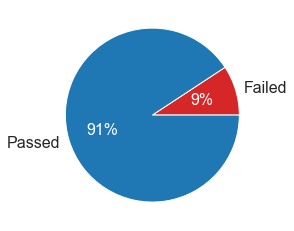

In [36]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('../data/run4/processed_data/passedsamples.svg')

# Metadata Curation

The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject.

## BioProject counts of passing metadata

In [37]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA375077    18
Abaum_Nick     16
PRJNA483526    12
PRJNA435672    11
PRJNA658638    10
growth         10
PRJNA400082     9
MRP             8
H2O2            8
vacJ_LL-37      8
COL             7
mutants         6
PRJEB11825      6
PRJNA657043     6
PRJNA545412     6
PRJNA328520     4
PRJEB11774      2
Name: BioProject, dtype: int64

## BioProject counts of all metadata

In [38]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA375077    18
Abaum_Nick     16
PRJNA483526    12
PRJNA435672    12
PRJNA658638    10
growth         10
PRJNA400082     9
COL             8
vacJ_LL-37      8
H2O2            8
MRP             8
PRJNA645064     8
mutants         6
PRJEB11825      6
PRJEB11774      6
PRJNA657043     6
PRJNA545412     6
PRJNA328520     4
PRJNA305130     1
Name: BioProject, dtype: int64

# Correlations between replicates

First, get a full sample name.

In [39]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [40]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.90. For samples with more than 2 replicates, the replicates must have R >= 0.90 with at least one other replicate or it will be dropped.

In [41]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [42]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/10731.0 [00:00<?, ?it/s]

In [43]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.98


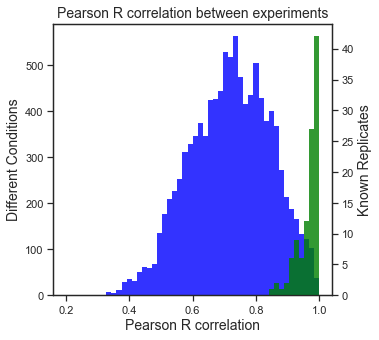

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [45]:
#pearson r cutoff for replicates
rcutoff = 0.90

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [46]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['LOS_AB5075', 'WT_AYE', 'LOS_AYE', 'WT_AB5075', 'adeRS', '0.5ug/ml'], dtype='object')

In [47]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [48]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [49]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [50]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [51]:
DF_metadata_final.shape

(139, 57)

In [52]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [53]:
#DF_log_tpm_final.to_csv(os.path.join(data_dir,'../interim/log_tpm_qc.csv'))
#DF_metadata_final.to_csv(os.path.join(data_dir,'../interim/metadata_qc.csv'))

# Pie chart

In [54]:
# Creating dataset
wedges = ['Failed FastQC', 'Too few reads mapped to CDS', 'Poor correlation with other datasets',
        'Poor correlation between replicates', 'Passed']

In [55]:
#Number that failed FastQC
a = DF_failed_fastqc.shape[0]

In [56]:
#Number that failed mRNA mapping
b = DF_failed_mrna.shape[0]

In [57]:
#Number that failed correlation with other datasets
c = failed_global_corr.shape[0]

In [58]:
#Number that failed number replicates/similar replicates
d = drop_conds.shape[0]

In [59]:
#Number that passed
e = DF_metadata_final.shape[0]

In [60]:
values = [a, b, c, d, e]

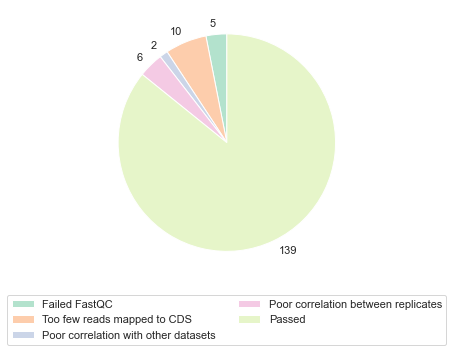

In [89]:
# Creating plot
cmap = plt.cm.get_cmap("Pastel2")
colors = cmap(np.arange(cmap.N))

fig = plt.figure(figsize=(5,5))
plt.pie(values, labels = values, colors=colors, startangle=90)

plt.legend(labels=wedges, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)

#plt.savefig("../figures/Piechart.svg",transparent=True)